In [64]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [65]:
# Read the dataset

df = pd.read_csv('Flight_Booking.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [66]:
# Drop unnecessary column

df = df.drop(columns = ['Unnamed: 0'])
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [67]:
df.shape

(300153, 11)

In [68]:
# Get basic information about the dataset

df.info

<bound method DataFrame.info of          airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration

In [69]:
# Get summary statistics for the numerical columns

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [70]:
# Checking out the missing values in a dataframe 

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [71]:
# Group the data by airline and calculate the average price

airline_prices = df.groupby('airline')['price'].mean()
print(airline_prices)

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64


The lowest average price for flights operated is by AirAsia, which is approximately 4091.07 and the highest average price for flights operated is by Vistara, which is approximately 30396.536302.

In [72]:
# Group the data by departure city and calculate the average price

city_prices = df.groupby('source_city')['price'].mean()
print(city_prices)

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64


 The average price for flights departing from Bangalore is approximately 21469.46 and so on for other cities.

# Data Visualization

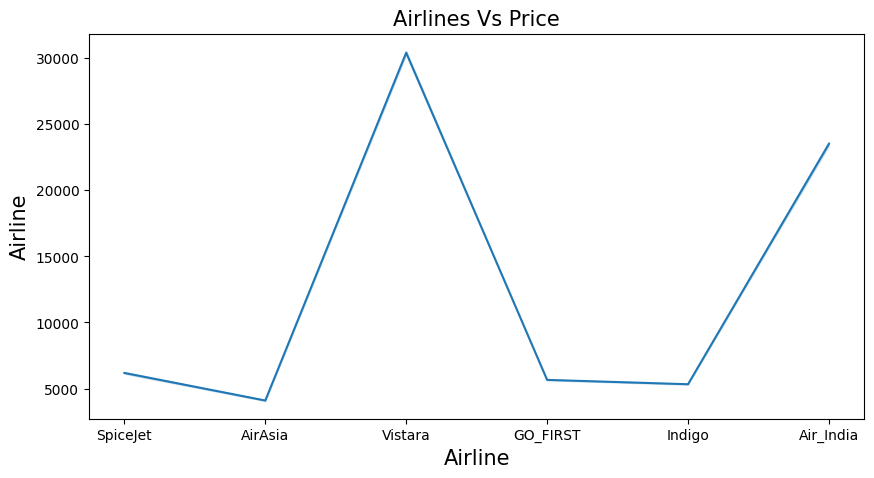

In [73]:
plt.figure(figsize = (10,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airlines Vs Price', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Airline', fontsize = 15)
plt.show()

The graph shows that there is a difference in prices among different airlines. However, this may be attributed to the fact that airlines operate flights to various destinations, and as a result, their prices may vary.




 

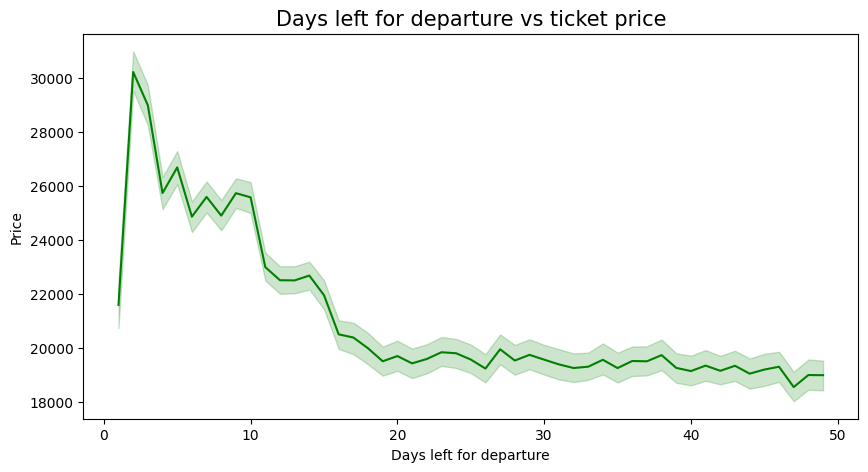

In [74]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = 'days_left', y = 'price', color = 'green')
plt.title('Days left for departure vs ticket price', fontsize = 15)
plt.xlabel('Days left for departure')
plt.ylabel('Price')
plt.show()


It can be seen from the graph that the price of the ticket increases as the days left for departure decreases.

<Axes: xlabel='airline', ylabel='price'>

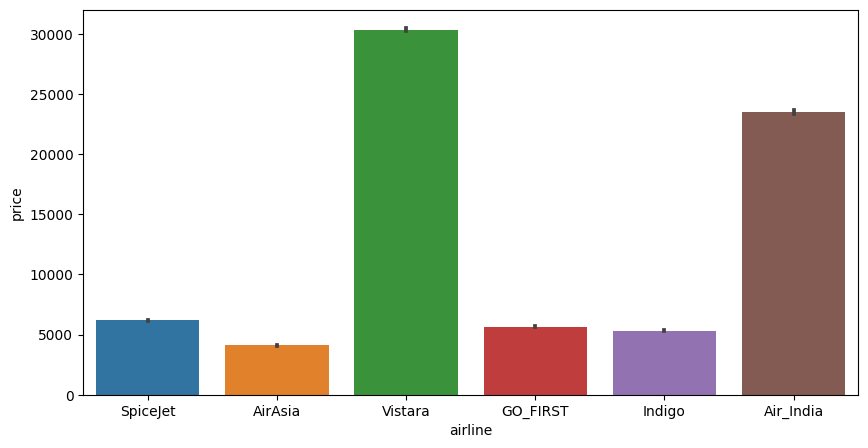

In [75]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'airline', y = 'price')

The graph shows price range of all the flights.

<Axes: xlabel='class', ylabel='price'>

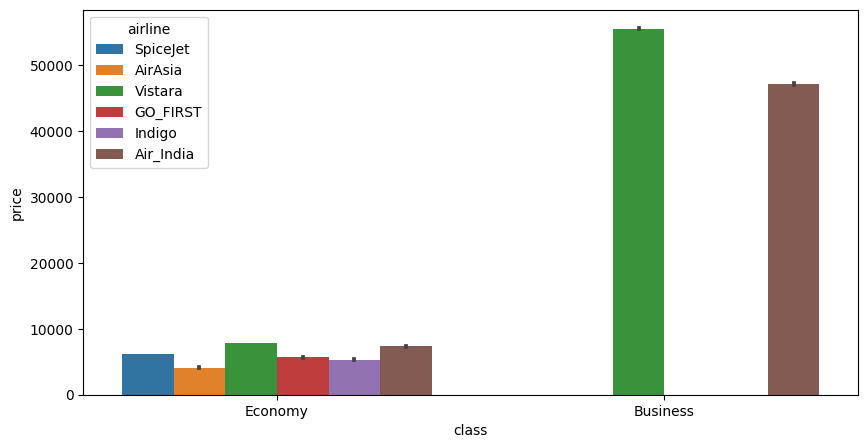

In [76]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'class', y = 'price', hue = 'airline')

The graph shows Range of price of all the
flights of Economy and
Business class.

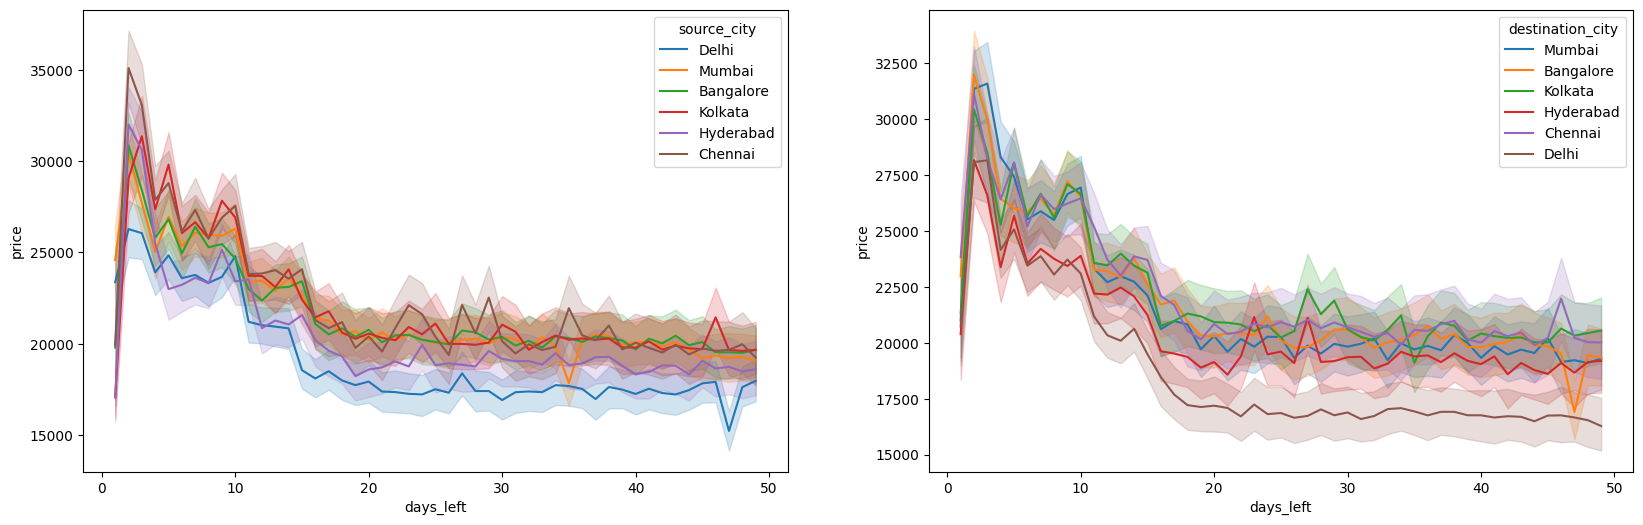

In [77]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.lineplot(data = df, x = 'days_left', y ='price', hue = 'source_city', ax = ax[0])
sns.lineplot(data = df, x = 'days_left', y ='price', hue = 'destination_city', ax = ax[1])
plt.show()

The graph shows Range of price of flights with source and destination city according to the days left. It can be seen that the price of the ticket increases as the days left for departure decreases and the same applies to all the cities.

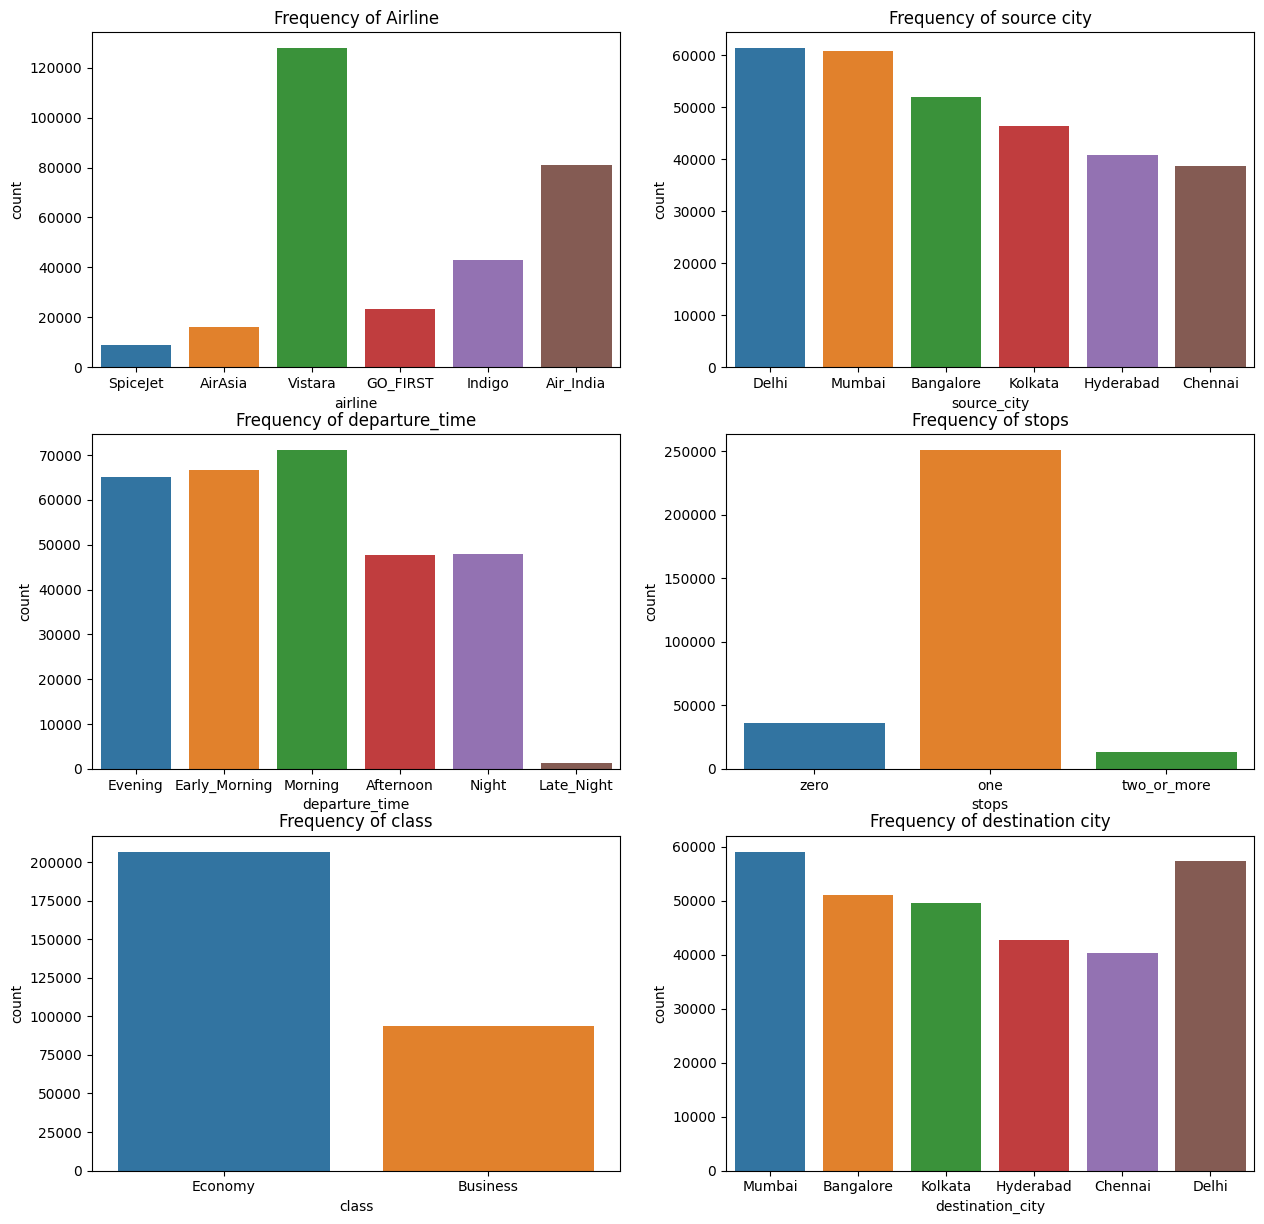

In [78]:
plt.figure(figsize = (15, 20))

plt.subplot(4, 2, 1)
sns.countplot(data = df, x = 'airline')
plt.title('Frequency of Airline')

plt.subplot(4, 2, 2)
sns.countplot(data = df, x = 'source_city')
plt.title('Frequency of source city')

plt.subplot(4, 2, 3)
sns.countplot(data = df, x = 'departure_time')
plt.title('Frequency of departure_time')

plt.subplot(4, 2, 4)
sns.countplot(data = df, x = 'stops')
plt.title('Frequency of stops')

plt.subplot(4, 2, 5)
sns.countplot(data = df, x = 'arrival_time')
plt.title('Frequency of arrival time')

plt.subplot(4, 2, 6)
sns.countplot(data = df, x = 'destination_city')
plt.title('Frequency of destination city')

plt.subplot(4, 2, 5)
sns.countplot(data = df, x = 'class')
plt.title('Frequency of class')

plt.show()

Based on the given graph, it can be observed that Vistara airlines has the highest frequency of flights, with Delhi being the city of highest departure frequency, followed by Mumbai. The mornings have the highest frequency of departure times, followed by early morning. Most flights have one stop during the journey. Economy class has the highest frequency of bookings compared to the business class. Mumbai is the most frequently traveled destination city, followed by Delhi.


# Label Encoding

Performing One Hot Encoding for categorical features of a
dataframe

In [79]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame with the categorical columns you want to encode
df_encoded = df.copy()  # Make a copy of the original DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Print the encoded DataFrame
print(df_encoded)

        airline   flight  source_city  departure_time  stops  arrival_time  \
0             4  SG-8709            2               2      2             5   
1             4  SG-8157            2               1      2             4   
2             0   I5-764            2               1      2             1   
3             5   UK-995            2               4      2             0   
4             5   UK-963            2               4      2             4   
...         ...      ...          ...             ...    ...           ...   
300148        5   UK-822            1               4      0             2   
300149        5   UK-826            1               0      0             5   
300150        5   UK-832            1               1      0             5   
300151        5   UK-828            1               1      0             2   
300152        5   UK-822            1               4      0             2   

        destination_city  class  duration  days_left  price  
0

# Feature Selection

In [80]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


<ipython-input-81-1f3c454dcc59>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot = True, cmap = 'coolwarm')


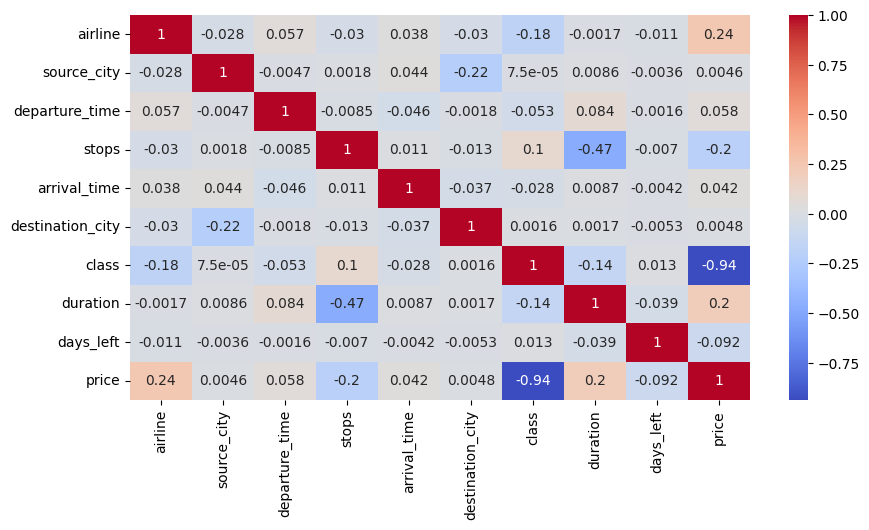

In [81]:
# Plotting the correlation graph to see the correlation between features and dependent variable.

plt.figure(figsize = (10,5))
sns.heatmap(df_encoded.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In the correlation heatmap above, it can be seen that there is a strong positive correlations between airline-price and duration-price, while strong negative correlations between price-class, duration-stops and destination_city - source_city.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df_encoded.columns:
    if ((df_encoded[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df_encoded[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [83]:
# Dropping the stops column. All features are having VIF less than 5. 

df = df_encoded.drop(columns = ['stops'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df_encoded[col].dtype != 'object') & (col != 'price' )):
        col_list.append(col)

X = df_encoded[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data) 

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


# Linear Regression

In [84]:
# Checking the encoded dataset

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [85]:
print(df_encoded.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [86]:
# Remove flight column as it does not have 

df_encoded = df_encoded.drop('flight', axis=1)

In [88]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 22.9 MB


In [89]:
# Applying standardization and implementing Linear Regression Model to predict the price of a flight.

X = df_encoded.drop(columns = ["price"])
y = df_encoded['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_Value', 'Predicted_Value'])
difference


,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [93]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE. 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_sq_error)

0.904554350718816
4624.994868016881
0.4353581089683269
49200540.293722
7014.309680483319


The outputs from the evaluation metrics provide information about the performance of your regression model. Here's a description of each metric:

R-squared (R2) Score: The R2 score represents the proportion of the variance in the target variable (y) that can be explained by the regression model. It ranges from 0 to 1, with a higher value indicating a better fit. In your case, the R2 score of 0.9045 suggests that approximately 90.45% of the variance in the target variable can be explained by the model.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. It provides an average magnitude of the errors, irrespective of their direction. In your case, the MAE value of 4624.9949 indicates that, on average, the predicted values deviate from the actual values by approximately 4624.9949.

Mean Absolute Percentage Error (MAPE): MAPE calculates the average percentage difference between the predicted values and the actual values. It is a relative measure that represents the average magnitude of the errors in percentage terms. In your case, the MAPE value of 0.4354 suggests that, on average, the predicted values deviate from the actual values by approximately 0.4354%.

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. It gives higher weight to larger errors and is useful for penalizing large deviations. In your case, the MSE value of 49200540.2937 indicates the average squared difference between the predicted and actual values.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides an interpretation of the error metric in the same unit as the target variable. It represents the average magnitude of the errors. In your case, the RMSE value of 7014.3097 indicates the average magnitude of the errors between the predicted and actual values.


# Plotting the graph of actual and predicted price of flight 

<ipython-input-96-a9d40af5dfe1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual')
<ipython-input-96-a9d40af5dfe1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


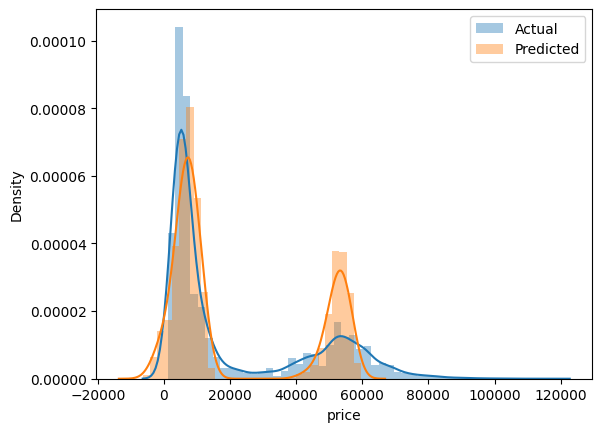

In [96]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

# Decision Tree Regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(r2_score(y_test, y_pred))

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_sq_error)

0.9756262597476687
1174.6623216893495
0.07380247515265675
12564231.040648906
3544.605907664335


R-squared (R2) Score: The R2 score represents the proportion of the variance in the target variable (y) that can be explained by the regression model. In this case, the R2 score of 0.9756 indicates that approximately 97.56% of the variance in the target variable can be explained by the Decision Tree model. A higher R2 score suggests a better fit of the model to the data.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. In this case, the MAE value of 1174.6623 indicates that, on average, the predicted values deviate from the actual values by approximately 1174.6623.

Mean Absolute Percentage Error (MAPE): MAPE calculates the average percentage difference between the predicted values and the actual values. In this case, the MAPE value of 0.0738 suggests that, on average, the predicted values deviate from the actual values by approximately 0.0738%.

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. In this case, the MSE value of 12564231.0406 indicates the average squared difference between the predicted and actual values.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides an interpretation of the error metric in the same unit as the target variable. In this case, the RMSE value of 3544.6059 indicates the average magnitude of the errors between the predicted and actual values.



# Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print(r2_score(y_test, y_pred))

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_sq_error)


0.9849969405147991
1088.3063538308115
0.07039061262847181
7733811.21392038
2780.9730696143715


R-squared (R2) Score: The R2 score of 0.9849 indicates that approximately 98.49% of the variance in the target variable can be explained by the Random Forest regression model. A higher R2 score suggests a better fit of the model to the data.

Mean Absolute Error (MAE): The MAE value of 1088.3064 represents the average absolute difference between the predicted values and the actual values. On average, the predicted values deviate from the actual values by approximately 1088.3064.

Mean Absolute Percentage Error (MAPE): The MAPE value of 0.0704 indicates the average percentage difference between the predicted values and the actual values. On average, the predicted values deviate from the actual values by approximately 0.0704%.

Mean Squared Error (MSE): The MSE value of 7733811.2139 represents the average squared difference between the predicted values and the actual values. It provides an overall measure of the error magnitude, giving higher weight to larger errors.

Root Mean Squared Error (RMSE): The RMSE value of 2780.9731 is the square root of the MSE and represents the average magnitude of the errors between the predicted and actual values. It provides an interpretation of the error metric in the same unit as the target variable.

<ipython-input-104-a9d40af5dfe1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual')
<ipython-input-104-a9d40af5dfe1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


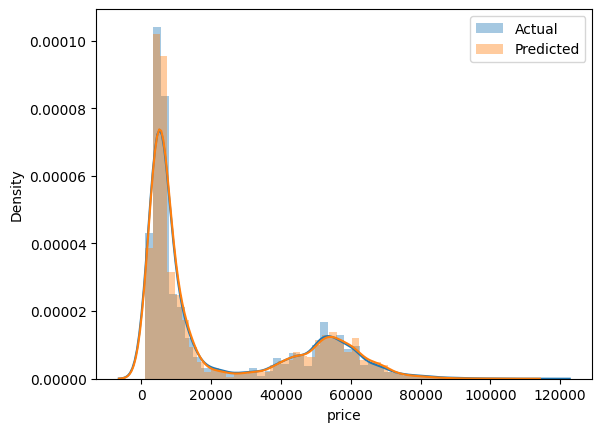

In [104]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

Based on the provided evaluation metrics, let's compare the results of Linear Regression, Decision Tree, and Random Forest models:

Linear Regression:

R2 Score: 0.9046
Mean Absolute Error (MAE): 4624.9949
Mean Absolute Percentage Error (MAPE): 0.4354
Mean Squared Error (MSE): 49200540.2937
Root Mean Squared Error (RMSE): 7014.3097
Decision Tree:

R2 Score: 0.9756
Mean Absolute Error (MAE): 1174.6623
Mean Absolute Percentage Error (MAPE): 0.0738
Mean Squared Error (MSE): 12564231.0406
Root Mean Squared Error (RMSE): 3544.6059
Random Forest:

R2 Score: 0.9849
Mean Absolute Error (MAE): 1088.3064
Mean Absolute Percentage Error (MAPE): 0.0704
Mean Squared Error (MSE): 7733811.2139
Root Mean Squared Error (RMSE): 2780.9731
Based on these results, we can draw the following conclusions:

Model Performance: The Random Forest model performs the best among the three models, as it achieves the highest R2 score of 0.9849. It indicates that approximately 98.49% of the variance in the target variable can be explained by the model.

Prediction Accuracy: In terms of mean absolute error (MAE), both the Decision Tree (1174.6623) and Random Forest (1088.3064) models outperform Linear Regression (4624.9949). This suggests that the tree-based models provide more accurate predictions.

Error Metrics: The Decision Tree and Random Forest models have lower mean squared error (MSE) and root mean squared error (RMSE) values compared to Linear Regression. This indicates that the tree-based models have better overall error magnitudes and provide more precise predictions.

Model Complexity: The Linear Regression model is relatively simpler compared to Decision Tree and Random Forest, which are non-linear models capable of capturing more complex relationships in the data.

Overall, both Decision Tree and Random Forest models outperform Linear Regression in terms of prediction accuracy and overall model performance. The Random Forest model, in particular, exhibits the highest accuracy and the lowest error metrics, indicating its superiority in this scenario. Therefore, it would be advisable to use the Random Forest model for predicting flight prices based on the given dataset.